In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [6]:
reg = load_boston()

In [7]:
xtr = reg.data
ytr = reg.target

In [9]:
print(xtr)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
mean = np.mean(xtr,axis = 0)
st = np.std(xtr,axis = 0)


In [12]:
xtr = (xtr-mean)/st

In [13]:
ones = np.ones((xtr.shape[0],1))

In [25]:
xtr = np.hstack((ones,xtr))

ytr.shape

(506,)

In [44]:
def hypo(xt,theta):
    return np.dot(xt,theta)

def error(xtr,ytr,theta):
    e = 0.0
    m = xtr.shape[0]
    y1 = hypo(xtr,theta)
    e = np.sum((y1-ytr)**2) 
    return e/m

def gradient(xtr,ytr,theta):
    m,n = xtr.shape
    yt = hypo(xtr,theta)
    grad = np.dot(xtr.T,(yt-ytr))
    return grad/m

def descent(xtr,ytr,rate = 0.01,epochs = 300):
    m,n = xtr.shape
    errorl = []
    theta = np.zeros((n,))
    for i in range(epochs):
        ee = error(xtr,ytr,theta)
        errorl.append(ee)
        grad = gradient(xtr,ytr,theta)
        theta = theta - rate*grad
    return theta,errorl
        

In [45]:
t,e = descent(xtr,ytr)
print(t)

[ 7.51012781  7.51012781  7.51012781 -0.62643933  0.48623759 -0.43636782
  0.83803659 -0.7079589   3.24408158 -0.15691145 -1.68855806  0.60131201
 -0.4268317  -1.76925428  0.85470264 -3.1983429 ]


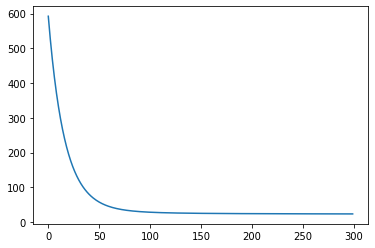

In [46]:
plt.plot(e)